In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
#purpose of code is to shift calibrated wavelenght solutions onto planetary rest frames
#we have λ which is the observed wavelength and want to find λ0
#recall doppler equation Δλ/λ0=v/c

In [26]:
#note we have 31 spectra to read in 

In [20]:
#step 1: make array of exposure names from 0-31 called listf
os.chdir("/Users/amelia/Desktop/PHYSICS199/nsdrp/nsdrp_out/ascii/flux/wave")
def make_file_list(path): #defines make_file_list as a function
    os.chdir(path) #changes directory to correct path 
    array_of_spectranames = [] #creates an empty array for spectra names
    expnum = [] #creates second array for numbers
    allnames=os.listdir() #makes list of allfiles in directory
    for i in allnames: #for all items in directory
        if "wasp44b_spec_wlsol_order71_" in i: #if file name contains string
            array_of_spectranames.append(i) #append to empty array
            expnum.append(float(i[30:32])) #append items with spectra number
    array_of_spectranames= np.array(array_of_spectranames) #makes into numpy array
    new_array = np.argsort(expnum) 
#    print(new_array, expnum, array_of_spectranames)
    array_of_spectranames = array_of_spectranames[new_array] #rearranges exposure numbers
    
    
    return array_of_spectranames, expnum, new_array


listf, expnum, new_array=make_file_list("/Users/amelia/Desktop/PHYSICS199/nsdrp/nsdrp_out/ascii/flux/wave")
#print(listf) 
print('done')

done


In [22]:
#step 2: make new 3d array, need wavelength solution, flux, and error for each solution
nexp= len(listf) #tells length, 32
testspectrum = np.load(listf[0]) #first index
npix,ncolumn= np.shape(testspectrum) #assign pixels, columns

all_spectra = np.zeros((npix,ncolumn,nexp)) #makes 3D array of zeroes

all_spectra[0,:,:] #pixels 0 in every column in every exposure

for i in range(nexp): #for i in range 0 to 32
    all_spectra[:,:,i] = np.load(listf[i]) #selects first, second, and third 2d array
print(all_spectra)   
    

[[[ 1.08087855e+04  1.08176951e+04  1.07909932e+04 ...  1.07995104e+04
    1.07993717e+04  1.07995115e+04]
  [ 3.23700000e+01  2.30200000e+02 -9.69900000e+00 ...  2.79600000e+03
    2.72600000e+03  2.85900000e+03]
  [ 1.31853360e+02  1.32374928e+02 -1.31923286e+02 ...  1.47624076e+02
    1.47351351e+02  1.47675620e+02]]

 [[ 1.08088796e+04  1.08178015e+04  1.07911319e+04 ...  1.07996078e+04
    1.07994698e+04  1.07996093e+04]
  [-1.33300000e+01  1.42000000e+02  8.44500000e+01 ...  2.87000000e+03
    2.98400000e+03  2.80400000e+03]
  [-1.31330049e+02  1.31725417e+02  1.31235431e+02 ...  1.46803069e+02
    1.47358025e+02  1.46960168e+02]]

 [[ 1.08089737e+04  1.08179080e+04  1.07912706e+04 ...  1.07997051e+04
    1.07995679e+04  1.07997070e+04]
  [-5.49500000e+01  5.17900000e+01 -6.96000000e+01 ...  3.10000000e+03
    3.02500000e+03  2.89000000e+03]
  [-1.31239551e+02  1.31513459e+02 -1.30655153e+02 ...  1.47268409e+02
    1.47201946e+02  1.46775013e+02]]

 ...

 [[ 1.10024379e+04  1.103

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] []


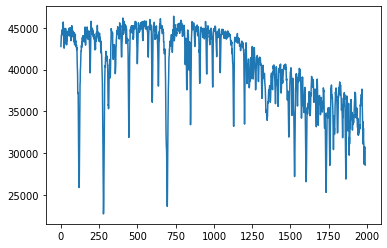

In [19]:
#step 3: 
# 2459154.92797 = midpoint of transit
# 0.0936 = transit length
#.0468 is half of the transit

os.chdir("/Users/amelia/Desktop/PHYSICS199/nsdrp/nsdrp_out/ascii/flux")

midt = 2459154.92797 #in JD
tdur = 0.0936 #in days
t1 = midt - .5*tdur
t4 = midt + .5*tdur

jds = np.load('WASP44JDS.npy') #load in spectra times 

outix1 = np.where(jds<t1)[0]
outix2 = np.where(jds>t4)[0] #no spectra
print(outix1, outix2)

aveflux = np.sum(all_spectra[:,1,outix1], axis=1) #average flux #need to normalize #take away from individual spectra
plt.plot(aveflux)



# #take average stellar spectrum away from in transit individual spectra
# f = open('spectratimes.txt.txt', 'r') #open text file of times

# #subtract the average flux calculated in list_offlux for each solution spectra n from the transit time in spectratimes.txt.txt
# for 


# #that difference is the planetary signal 
# #shift the wavelenght solution once we have the difference in tbe flux 

In [2]:
#normalize the data
""" The following program is an introduction to SPORK and instructions on how to apply it to spectra.
    The first block is the source of SPORK, followed by the second block on how to use it and an explanation for it's parameters.
    (More details on the README). """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from scipy import interpolate
from astropy.io import fits


In [ ]:
 shift the spectra to the planetary rest frame
#look for excess absorption to shift
#average of all out of transit spectra= stellar spectrum. when planet transits, take differentce in stellar spectrum and planet+stellar specttrum
#stellar spectrum is average of all out of transit spectra
#stellar spectrum is "out", star+planet is "in transit", give you total absorption in planetary reference frame

#2459154.819 
Event Midpoint JD UT [days]
# 2459154.92797 = midpoint
# 0.0936 = transit length
#.0468 is half 
#

[10799.15819093   669.8          134.2553618 ]
